In [1]:
using Plots

In [16]:
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [3]:
include("cavitymethod.jl")

rho_bouchaud_population (generic function with 1 method)

In [17]:
Plots.scalefontsizes(1.5)

In [5]:
Np = 2500
nsteps = 25000
epsilon = 1.e-300
ensemble = Int64(10^5);

In [6]:
epsilon2 = 1.e-3

0.001

## Overview

In [7]:
T = 0.1
lambda_barrat = -linspace(-0.,1.01,200)

0.0:-0.005075376884422111:-1.01

In [8]:
c = 5

5

In [9]:
rho_ba = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, epsilon2) for i in lambda_barrat];

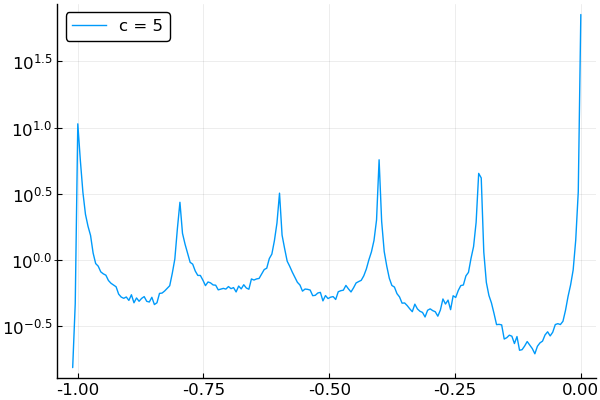

In [22]:
plot(lambda_barrat, rho_ba[:,1], label = "c = $(c)", yscale = :log10)

## First peak

In [60]:
#lambda = -linspace(0.19,0.21,100)
lambda = logspace(-10,-1,201);

In [55]:
ep = [1.e-3, 1.e-4,1e-5,1.e-6, 1.e-10]

5-element Array{Float64,1}:
 0.001  
 0.0001 
 1.0e-5 
 1.0e-6 
 1.0e-10

### Left side

In [61]:
l1 = -(lambda + 0.2);

In [62]:
rho_1 = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, ep[1]) for i in l1];

In [63]:
for k in 2:length(ep)
    rho = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, ep[k]) for i in l1];
    rho_1 = hcat(rho_1,rho)
end

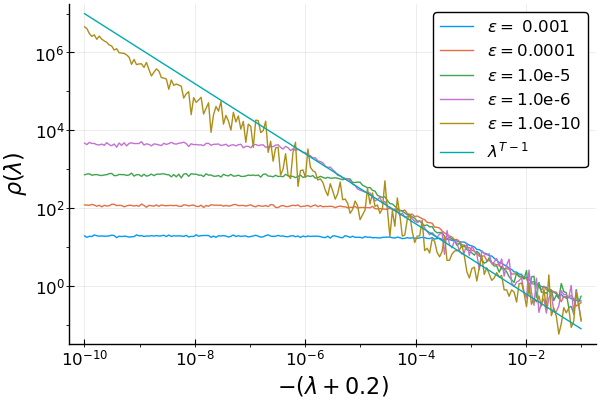

In [64]:
plot(lambda, rho_1[:,1], label = L"\epsilon ="*" $(ep[1])", xscale = :log10, yscale = :log10)
for i in 2:length(ep)
    plot!(lambda, rho_1[:,i], label = L"\epsilon ="*"$(ep[i])")
end
plot!(xlabel = L"-(\lambda + 0.2)", ylabel = L"\rho(\lambda)")
plot!(lambda, lambda.^(T - 1)/100, label = L"\lambda^{T - 1}")

### Right side

In [65]:
l2 = (lambda - 0.2);

In [66]:
rho_2 = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, ep[1]) for i in l2];

In [67]:
for k in 2:length(ep)
    rho = [rho_barrat_population(i, c, T, Np, ensemble, nsteps, epsilon, ep[k]) for i in l2];
    rho_2 = hcat(rho_2,rho)
end

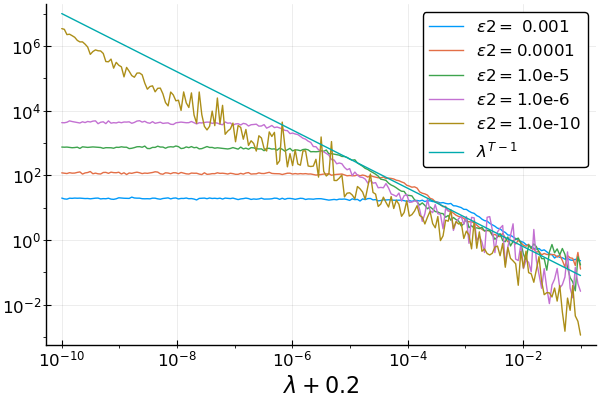

In [68]:
plot(lambda, rho_2[:,1], label = L"\epsilon2 ="*" $(ep[1])", xscale = :log10, yscale = :log10)
for i in 2:length(ep)
    plot!(lambda, rho_2[:,i], label = L"\epsilon2 ="*"$(ep[i])")
end
plot!(xlabel = L"\lambda + 0.2")
plot!(lambda, lambda.^(T - 1)/100, label = L"\lambda^{T - 1}")

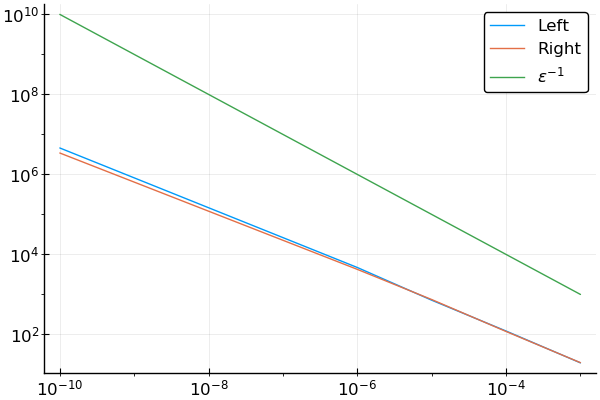

In [74]:
plot(ep,rho_1[1,:], xscale = :log10, yscale = :log10, label = "Left")
plot!(ep,rho_2[1,:], xscale = :log10, yscale = :log10, label = "Right")
plot!(ep,ep.^-1, xscale = :log10, yscale = :log10, label = L"\epsilon^{-1}")